## Homework 1

### Question 1

#### Q1.1

Import required packages.

In [40]:
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install sklearn
import numpy as np
import pickle
from sklearn import preprocessing

Create `myknn_regressor` class.

In [41]:
class myknn_regressor():
    
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """
        mean_type can be equal_weight or remove_outliers.
        equal_weight use the same weight for all neighbors.
        remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR].
        """
        if n_neighbors <= 0:
            print('Error: n_neighbors should be nonneg')
            exit(1)
        elif mean_type not in ['equal_weight', 'remove_outliers']:
            print('Error: mean_type should be one of \'equal_weight\' or \'remove_outliers\'')
            exit(1)
        
        self.n_neighbors = n_neighbors
        self.mean_type = mean_type

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
        
        y_pred = []
        for x in x_test:
            dist = np.linalg.norm(x - self.x_train, axis=1)
            selected_idx = np.argsort(dist, kind='stable')[:self.n_neighbors]
            
            if (self.mean_type == 'remove_outliers') and (self.n_neighbors >= 10):
                # remove outliers
                q1 = np.quantile(self.y_train[selected_idx], .25)
                q3 = np.quantile(self.y_train[selected_idx], .75)
                iqr = q3 - q1
                def notOutlier(idx):
                    return ((self.y_train[idx] >= q1 - 1.5*iqr) and (self.y_train[idx] <= q3 + 1.5*iqr))
                selected_idx = list(filter(notOutlier, selected_idx))
                 
            pred = np.mean(self.y_train[selected_idx])
            y_pred.append(pred)
        
        return np.array(y_pred)
                

#### Q1.2
Load and standardize data.

In [42]:
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
x_train = xscaler.transform(msd_data['X_train'])
x_test = xscaler.transform(msd_data['X_test'])
y_train = msd_data['Y_train']
y_test = msd_data['Y_test']

Fit the KNN regressor and predict.

In [43]:
myknn = myknn_regressor(20, 'equal_weight')
myknn.fit(x_train, y_train)
y_pred = myknn.predict(x_test)

Compute RMSE.

In [44]:
def rmse(ground_truth, prediction):
    mse = np.mean((ground_truth - prediction) ** 2)
    return np.sqrt(mse)
print(f'RMSE = {rmse(y_test, y_pred)}')

RMSE = 10.25126451549596


List the first 20 predictions.

In [45]:
np.set_printoptions(precision=2)
print(f'Predictions: {y_pred[:20]}')

Predictions: [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]


#### Q1.3

Data have been load and standardized in the previous section.

Fit the KNN model with type 'remove outlier' and predict.

In [46]:
myknn = myknn_regressor(20, 'remove_outliers')
myknn.fit(x_train, y_train)
y_pred = myknn.predict(x_test)

Compute RMSE.

In [47]:
print(f'RMSE = {rmse(y_test, y_pred)}')

RMSE = 10.212572466080376


List the first 20 predictions.

In [48]:
print(f'Predictions: {y_pred[:20]}')

Predictions: [1993.35 1993.8  2000.65 1992.74 1992.8  2000.   1988.1  1991.65 2002.25
 2003.95 2000.5  2000.94 1995.55 1997.2  1998.61 1997.4  1992.15 2003.83
 2003.2  1995.75]


### Question 2

[Setting 1] KNeighborsRegressor with standardization

In [49]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

k_settings = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]

# data standardization
x_train, y_train = msd_data['X_train'], msd_data['Y_train']
x_test, y_test = msd_data['X_test'], msd_data['Y_test']
xscaler = preprocessing.StandardScaler().fit(x_train)
x_train_stdize = xscaler.transform(x_train)
x_test_stdize = xscaler.transform(x_test)

# compute rmse under different k
kneireg_stdize_rmse = []
for k in k_settings:
    print(f'Computing k = {k}')
    kneireg = KNeighborsRegressor(n_neighbors=k)
    kneireg.fit(x_train_stdize, y_train)
    y_pred = kneireg.predict(x_test_stdize)
    kneireg_stdize_rmse.append(rmse(y_test, y_pred))
print(kneireg_stdize_rmse)

Computing k = 1
Computing k = 2
Computing k = 3
Computing k = 4
Computing k = 5
Computing k = 10
Computing k = 15
Computing k = 20
Computing k = 25
Computing k = 30
Computing k = 35
Computing k = 40
Computing k = 45
Computing k = 50
Computing k = 55
Computing k = 60
Computing k = 80
Computing k = 100
Computing k = 120
Computing k = 140
Computing k = 160
Computing k = 180
Computing k = 200
[13.911074724837043, 12.068170946750795, 11.389120864846157, 11.1123354880961, 10.894692897614565, 10.425998912973919, 10.318171959828572, 10.25126451549596, 10.23762722509469, 10.215977156359507, 10.205243203546763, 10.204332770527754, 10.207243171822855, 10.206033712139762, 10.208862384446808, 10.21700262724764, 10.231954198429056, 10.247295947386965, 10.264908458982783, 10.287098382403647, 10.317788599090449, 10.330995620176944, 10.351940397014143]


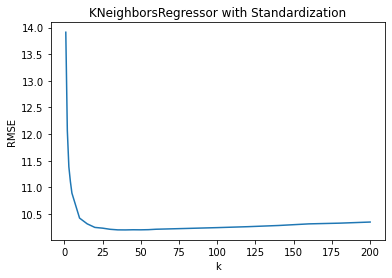

In [50]:
# plot
plt.plot(k_settings, kneireg_stdize_rmse)
plt.title('KNeighborsRegressor with Standardization')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

[Setting 2] KNeighborsRegressor without standardization

In [51]:
# compute rmse under different k
kneireg_rmse = []
for k in k_settings:
    print(f'Computing k = {k}')
    kneireg = KNeighborsRegressor(n_neighbors=k)
    kneireg.fit(x_train, y_train)
    y_pred = kneireg.predict(x_test)
    kneireg_rmse.append(rmse(y_test, y_pred))
print(kneireg_rmse)

Computing k = 1
Computing k = 2
Computing k = 3
Computing k = 4
Computing k = 5
Computing k = 10
Computing k = 15
Computing k = 20
Computing k = 25
Computing k = 30
Computing k = 35
Computing k = 40
Computing k = 45
Computing k = 50
Computing k = 55
Computing k = 60
Computing k = 80
Computing k = 100
Computing k = 120
Computing k = 140
Computing k = 160
Computing k = 180
Computing k = 200
[14.923638966418345, 12.777499755429464, 12.075674967716129, 11.767805657810635, 11.466392632384432, 11.07746090040493, 10.888979137947995, 10.797788546734928, 10.79007301797969, 10.75026561256701, 10.717738719772289, 10.714437504678756, 10.698494013475852, 10.69110105960404, 10.682608734124413, 10.672535729098724, 10.662907517124493, 10.67701950452466, 10.683139638996407, 10.687017556442052, 10.691630026202155, 10.69071978380711, 10.698853374700175]


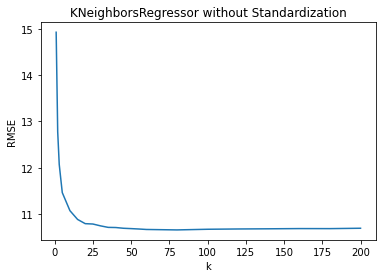

In [52]:
# plot
plt.plot(k_settings, kneireg_rmse)
plt.title('KNeighborsRegressor without Standardization')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

[Setting 3] Myknn_regressor(remove_outliers) with standardization

In [53]:
# compute rmse under different k
myknn_rmse = []
for k in k_settings:
    print(f'Computing k = {k}')
    myknn = myknn_regressor(n_neighbors=k, mean_type='remove_outliers')
    myknn.fit(x_train_stdize, y_train)
    y_pred = myknn.predict(x_test_stdize)
    myknn_rmse.append(rmse(y_test, y_pred))
print(myknn_rmse)

Computing k = 1
Computing k = 2
Computing k = 3
Computing k = 4
Computing k = 5
Computing k = 10
Computing k = 15
Computing k = 20
Computing k = 25
Computing k = 30
Computing k = 35
Computing k = 40
Computing k = 45
Computing k = 50
Computing k = 55
Computing k = 60
Computing k = 80
Computing k = 100
Computing k = 120
Computing k = 140
Computing k = 160
Computing k = 180
Computing k = 200
[13.911074724837043, 12.068170946750795, 11.389120864846157, 11.1123354880961, 10.894692897614565, 10.468549209697088, 10.293424167991525, 10.212572466080376, 10.19147537897133, 10.132105705172414, 10.109608004792985, 10.093231539122922, 10.080018891479627, 10.08078333324933, 10.059767600751963, 10.073857809066583, 10.063683549276588, 10.064917276737452, 10.067237203620246, 10.090646192390137, 10.115316675702928, 10.124987056716318, 10.146220720227745]


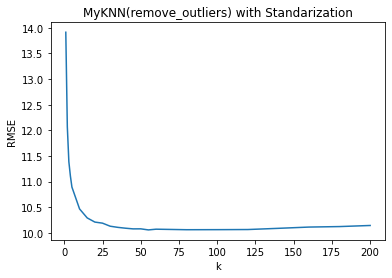

In [54]:
# plot
plt.plot(k_settings, myknn_rmse)
plt.title('MyKNN(remove_outliers) with Standardization')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

Plot the three curves all together.

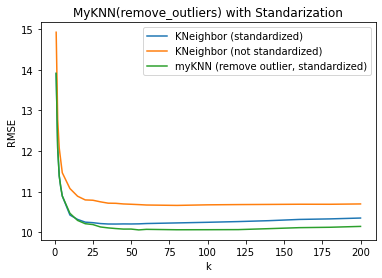

In [55]:
plt.plot(k_settings, kneireg_stdize_rmse, label='KNeighbor (standardized)')
plt.plot(k_settings, kneireg_rmse, label='KNeighbor (not standardized)')
plt.plot(k_settings, myknn_rmse, label='myKNN (remove outlier, standardized)')
plt.title('MyKNN(remove_outliers) with Standarization')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### Discussion
From the figure above, we can see that the only setting without standardizing feature values (the second setting) results in larger RMSE. Moreover, removing outliers seems to be effective when dealing with standardized data in this dataset.